# **Analyst Data: Data Science Salaries Dataset**

*   Nama: Eva Theresia Pardede
*   Jurusan: Sistem Informasi
*   Email: evatheresiapardede@gmail.com
*   Linkedin: https://www.linkedin.com/in/eva-theresia-pardede-2157b0246/
*   GitHub: https://github.com/Evathrsprdd








## **Menentukan Pertanyaan**

**Mengidentifikasi Pertanyaan yang Specific, Measurable, Action-oriented, Relevant, Time-bound (SMART):**
1. Apa 5 pekerjaan(job title) dengan jumlah karyawan terbanyak dari tahun 2020 hingga 2024?
2. Bagaimana tren rata-rata kenaikan gaji(salary in usd) untuk 5 pekerjaan(job title) dengan jumlah karyawan terbanyak dari tahun 2020 hingga 2024?
3. Bagaimana 5 distribusi gaji(salary in usd) tertinggi untuk setiap pekerjaan(job title) karyawan?
4. Berapa persentase karyawan yang tempat(employee residence) tinggalnya berada di kota yang sama dengan lokasi perusahaan(company location) tempat mereka bekerja?
5. Bagaimana persentase antara ukuran perusahaan(company size) dan lokasi perusahaan(company location) dengan jumlah terbanyak?
6. Bagaimana persebaran data antara gaji(salary in usd), tingkat pengalaman(experience level), dan ukuran perusahaan(company size)?
7. Bagaimana demografi antara gaji(salary in usd), jenis pekerjaan(employment type), dan rasio pekerjaan jarak jauh(remote ratio)?




## **Import Semua Packages/Library yang Digunakan**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import zipfile

In [51]:
!gdown --id 16q8-FPb7BY9D31TOpW2BbRIgvR_v-ui2

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16q8-FPb7BY9D31TOpW2BbRIgvR_v-ui2
To: /content/Data_Science_Salaries.zip
100% 70.9k/70.9k [00:00<00:00, 93.2MB/s]


In [52]:
# Path of downloaded ZIP file
zip_path = "/content/Data_Science_Salaries.zip"

# Extraction destination folder path
extract_path = "/content/dataset"

# Ektraction file
if zip_path.endswith(".zip"):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"The dataset was successfully extracted to {extract_path}")

The dataset was successfully extracted to /content/dataset


In [53]:
import pandas as pd
df= pd.read_csv('/content/dataset/DataScience_salaries_2024.csv')
print(df.head())

   work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   

  company_location company_size  
0   

**Insight:**
 Pada tahap ini, dilakukan impor semua paket/perpustakaan yang diperlukan.


## **Data Wrangling**

### Gathering Data

In [54]:
salaries_dataset_df = pd.read_csv('/content/dataset/DataScience_salaries_2024.csv')
salaries_dataset_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


**Insight:**
 Pada tahap Gathering Data, dilakukan proses pengumpulan data yang diperoleh dari sumber Kaggle. Data tersebut kemudian diunduh dan diakses melalui Google Drive.


### Assessing Data

In [55]:
#Menilai Informasi Data salaries_dataset_df
salaries_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [56]:
#Melihat Missing Values salaries_dataset_df
salaries_dataset_df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [57]:
#Melihat Deskripsi salaries_dataset_df
salaries_dataset_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [58]:
#Melihat Data Duplikasi salaries_dataset_df
print("Jumlah duplikasi: ", salaries_dataset_df.duplicated().sum())

Jumlah duplikasi:  5711


In [59]:
#Menampilkan Baris Duplikat
data_duplikat = salaries_dataset_df[salaries_dataset_df.duplicated()]
print(data_duplikat)

       work_year experience_level employment_type                   job_title  \
72          2024               MI              FT  Machine Learning Scientist   
84          2024               MI              FT           Research Engineer   
93          2024               SE              FT   Machine Learning Engineer   
97          2024               SE              FT          Research Scientist   
105         2024               MI              FT           Research Engineer   
...          ...              ...             ...                         ...   
14787       2022               MI              FT               Data Engineer   
14792       2024               EN              FT                Data Analyst   
14793       2024               EN              FT                Data Analyst   
14794       2024               EN              FT                Data Analyst   
14796       2023               EN              FT                Data Analyst   

       salary salary_curren

**Insight:**
 Pada tahap Assessing Data, dilakukan penilaian terhadap data. Proses ini mencakup pemeriksaan informasi data, identifikasi nilai yang hilang (missing values), analisis deskripsi data, dan pengecekan duplikasi. Hasilnya, ditemukan bahwa dataset mengandung 5.711 data duplikat.


### Cleaning Data

In [60]:
#Menghapus Duplikasi
salaries_dataset_df = salaries_dataset_df.drop_duplicates()

#Konfirmasi Jumlah Data Setelah Penghapusan
print("Jumlah data setelah menghapus duplikasi: ", len(salaries_dataset_df))
print("Jumlah duplikasi: ", salaries_dataset_df.duplicated().sum())

Jumlah data setelah menghapus duplikasi:  9127
Jumlah duplikasi:  0


In [61]:
#Menilai Informasi Data salaries_dataset_df
salaries_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9127 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9127 non-null   int64 
 1   experience_level    9127 non-null   object
 2   employment_type     9127 non-null   object
 3   job_title           9127 non-null   object
 4   salary              9127 non-null   int64 
 5   salary_currency     9127 non-null   object
 6   salary_in_usd       9127 non-null   int64 
 7   employee_residence  9127 non-null   object
 8   remote_ratio        9127 non-null   int64 
 9   company_location    9127 non-null   object
 10  company_size        9127 non-null   object
dtypes: int64(4), object(7)
memory usage: 855.7+ KB


**Insight:**
 Pada tahap Cleaning Data, dilakukan proses pembersihan data. Tahap ini bertujuan untuk menangani masalah yang ditemukan pada tahap Assessing Data, sehingga untuk tahap ini dilakuakn penghapusan data duplikat.


## **Exploratory Data Analysis (EDA)**

**Mengidentifikasi Pertanyaan yang Specific, Measurable, Action-oriented, Relevant, Time-bound (SMART):**
1. Apa 5 pekerjaan(job title) dengan jumlah karyawan terbanyak dari tahun 2020 hingga 2024?
2. Bagaimana tren rata-rata kenaikan gaji(salary in usd) untuk 5 pekerjaan(job title) dengan jumlah karyawan terbanyak dari tahun 2020 hingga 2024?
3. Bagaimana 5 distribusi gaji(salary in usd) tertinggi untuk setiap pekerjaan(job title) karyawan?
4. Berapa persentase karyawan yang tempat(employee residence) tinggalnya berada di kota yang sama dengan lokasi perusahaan(company location) tempat mereka bekerja?
5. Bagaimana persentase antara ukuran perusahaan(company size) dan lokasi perusahaan(company location) dengan jumlah karyawan terbanyak?
6. Bagaimana persebaran data antara gaji(salary in usd), tingkat pengalaman(experience level), dan ukuran perusahaan(company size)?
7. Bagaimana demografi antara gaji(salary in usd), jenis pekerjaan(employment type), dan rasio pekerjaan jarak jauh(remote ratio)?




In [62]:
#Pertanyaan No 1
#Menampilkan 5 pekerjaan dengan jumlah karyawan terbanyak
top_titles = salaries_dataset_df['job_title'].value_counts().head(5).reset_index()
print(top_titles)

                   job_title  count
0              Data Engineer   1709
1             Data Scientist   1684
2               Data Analyst   1245
3  Machine Learning Engineer    867
4         Analytics Engineer    333


In [63]:
#Pertanyaan No 2
# Mendapatkan 5 jabatan teratas
top_titles_tren = salaries_dataset_df['job_title'].value_counts().head(5).index
# Filter data untuk jabatan teratas
top_titles_data = salaries_dataset_df[salaries_dataset_df['job_title'].isin(top_titles_tren)]


In [64]:
# Mengelompokkan data berdasarkan tahun dan jabatan
salary_trend = top_titles_data.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()
print(salary_trend)

    work_year                  job_title  salary_in_usd
0        2020               Data Analyst   60911.166667
1        2020              Data Engineer   85301.384615
2        2020             Data Scientist   85970.523810
3        2020  Machine Learning Engineer  145904.500000
4        2021               Data Analyst   78258.500000
5        2021              Data Engineer   93258.166667
6        2021             Data Scientist   79366.230769
7        2021  Machine Learning Engineer   74611.222222
8        2022         Analytics Engineer  138036.306122
9        2022               Data Analyst  105140.041667
10       2022              Data Engineer  138287.874101
11       2022             Data Scientist  130981.100000
12       2022  Machine Learning Engineer  141320.737500
13       2023         Analytics Engineer  163534.350282
14       2023               Data Analyst  108714.460938
15       2023              Data Engineer  148982.559497
16       2023             Data Scientist  159634

In [65]:
#Pertanyaan No 3
top_salaries_by_job = salaries_dataset_df.groupby('job_title')['salary_in_usd'].max().head(5).reset_index()
print(top_salaries_by_job)

            job_title  salary_in_usd
0        AI Architect         800000
1        AI Developer         275000
2         AI Engineer         400000
3  AI Product Manager         212000
4       AI Programmer         120000


In [66]:
#Pertanyaan No 4
#Menambah 1 kolom untuk same_location
salaries_dataset_df['same_location']=salaries_dataset_df['employee_residence'] == salaries_dataset_df['company_location']
salaries_dataset_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,same_location
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L,True
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L,False
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,True
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S,True
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L,True


In [67]:
#Menghitung jumlah same_location
same_location_count = salaries_dataset_df['same_location'].value_counts()
print(same_location_count)

same_location
True     8999
False     128
Name: count, dtype: int64


In [68]:
#Pertanyaan No 5
company_size_location = salaries_dataset_df.groupby(['company_location', 'company_size']).size().reset_index(name='count')
top_company_size_location = company_size_location.sort_values(by='count', ascending=False).head(5)
print(top_company_size_location)


    company_location company_size  count
145               US            M   7087
55                GB            M    475
144               US            L    367
23                CA            M    319
146               US            S     66


In [69]:
#Menampilkan total company_size
company_sz = salaries_dataset_df['company_size'].value_counts().reset_index()
print(company_sz)

  company_size  count
0            M   8323
1            L    624
2            S    180


In [70]:
#Pertanyaan No 7
#Mengelompokan Data
aggregated_data = salaries_dataset_df.groupby(['employment_type', 'remote_ratio'], as_index=False)['salary_in_usd'].mean()
print(aggregated_data)

   employment_type  remote_ratio  salary_in_usd
0               CT             0   93130.666667
1               CT            50   84317.666667
2               CT           100  123556.352941
3               FL             0   28000.000000
4               FL            50   48518.333333
5               FL           100   56440.375000
6               FT             0  152009.484832
7               FT            50   84527.622318
8               FT           100  143247.567131
9               PT             0   95505.000000
10              PT            50   51993.428571
11              PT           100   46175.375000


In [71]:
all_df = salaries_dataset_df

## **Visualization & Explanatory Analysis**

<ipython-input-72-f05625832569>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_titles, x='count', y='job_title', palette=['#2c5e51'])
<ipython-input-72-f05625832569>:4: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_titles, x='count', y='job_title', palette=['#2c5e51'])


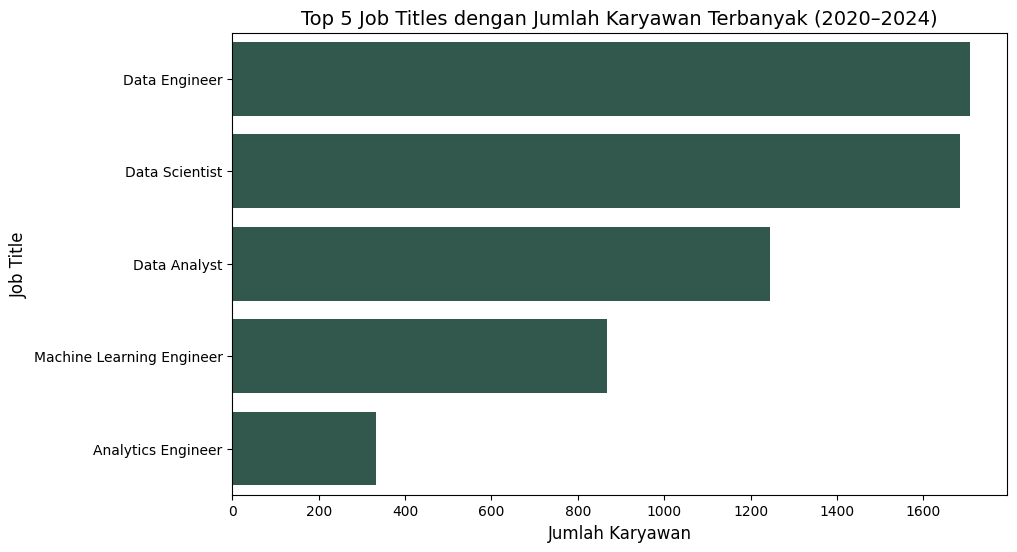

In [72]:
#Pertanyaan No 1
# Visualisasi menggunakan Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_titles, x='count', y='job_title', palette=['#2c5e51'])
plt.title('Top 5 Job Titles dengan Jumlah Karyawan Terbanyak (2020–2024)', fontsize=14)
plt.xlabel('Jumlah Karyawan', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.show()


**Insight:** Apa 5 pekerjaan(job title) dengan jumlah karyawan terbanyak dari tahun 2020 hingga 2024?

Berdasarkan analisis data yang dilakukan untuk periode 2020 hingga 2024, lima pekerjaan (job title) dengan jumlah karyawan terbanyak adalah Data Engineer, Data Scientist, Data Analyst, Machine Learning Engineer, dan Analytics Engineer.

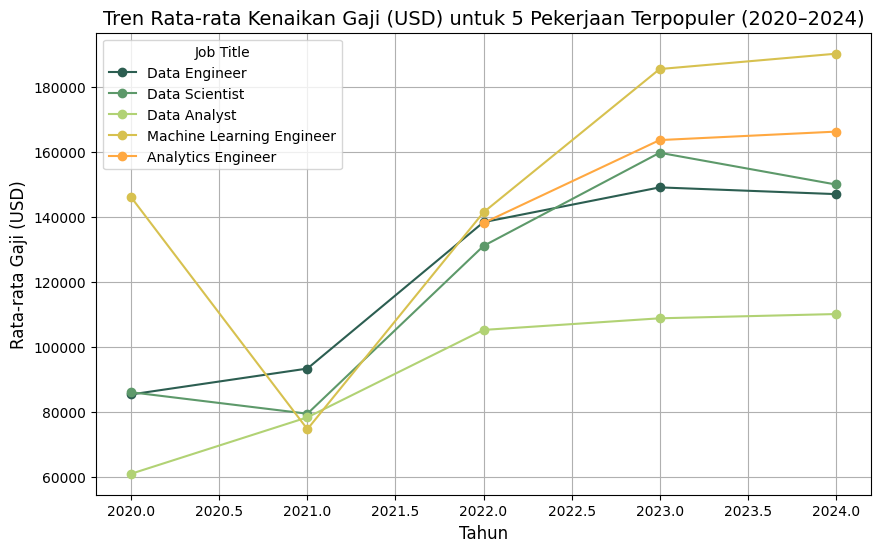

In [73]:
#Pertanyaan No 2
colors = ['#2c5e51' ,'#5d996a', '#b1d274' ,'#d7c14f' ,'#ffa841']

# Plot line chart
plt.figure(figsize=(10, 6))
for idx, job_title in enumerate(top_titles_tren):
    job_data = salary_trend[salary_trend['job_title'] == job_title]
    plt.plot(job_data['work_year'], job_data['salary_in_usd'], marker='o', label=job_title, color=colors[idx])

# Tambahkan judul dan label
plt.title('Tren Rata-rata Kenaikan Gaji (USD) untuk 5 Pekerjaan Terpopuler (2020–2024)', fontsize=14)
plt.xlabel('Tahun',fontsize=12)
plt.ylabel('Rata-rata Gaji (USD)',fontsize=12)
plt.legend(title='Job Title')
plt.grid(True)
plt.show()


**Insight:** Bagaimana tren rata-rata kenaikan gaji(salary in usd) untuk 5 pekerjaan(job title) dengan jumlah karyawan terbanyak dari tahun 2020 hingga 2024?


Berdasarkan analisis data yang dilakukan untuk periode 2020 hingga 2024, lima pekerjaan (job title) dengan jumlah karyawan terbanyak adalah Data Engineer, Data Scientist, Data Analyst, Machine Learning Engineer, dan Analytics Engineer. Pada tahun 2021, terlihat adanya penurunan yang cukup tajam dalam rata-rata gaji, yang mungkin dipengaruhi oleh faktor eksternal seperti pandemi. Namun, setelah 2021, terjadi pemulihan yang konsisten, diikuti dengan peningkatan yang stabil hingga tahun 2024. Hal ini menunjukkan bahwa permintaan untuk pekerjaan di bidang teknologi dan data semakin meningkat.

<ipython-input-74-b4572b54cc77>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_salaries_by_job, x='job_title', y='salary_in_usd', palette=['#ffa841'])
<ipython-input-74-b4572b54cc77>:4: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_salaries_by_job, x='job_title', y='salary_in_usd', palette=['#ffa841'])


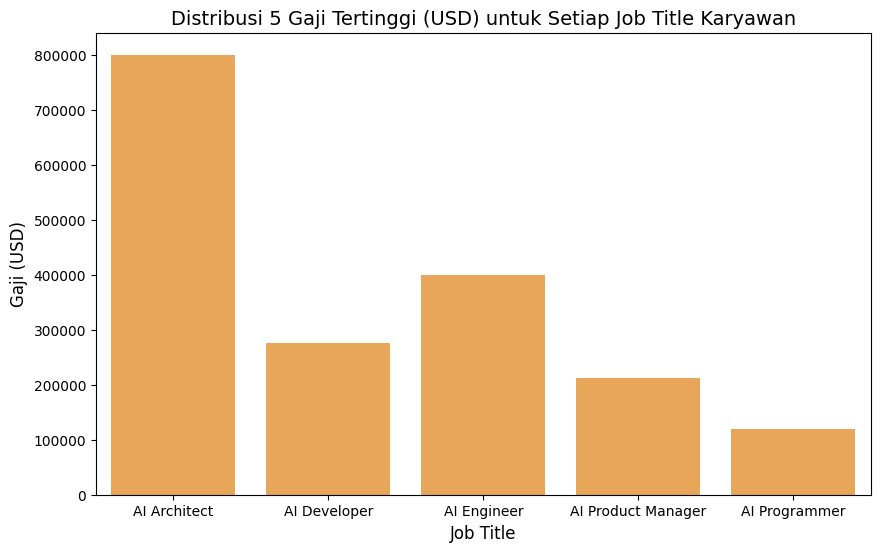

In [74]:
#Pertanyaan No 3
# Visualisasi menggunakan Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_salaries_by_job, x='job_title', y='salary_in_usd', palette=['#ffa841'])
plt.title('Distribusi 5 Gaji Tertinggi (USD) untuk Setiap Job Title Karyawan', fontsize=14)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Gaji (USD)', fontsize=12)
plt.show()



**Insight:** Bagaimana 5 distribusi gaji(salary in usd) tertinggi untuk setiap pekerjaan(job title) karyawan?

Berdasarkan hasil analisis distribusi gaji untuk setiap pekerjaan (job title) karyawan, lima pekerjaan dengan gaji tertinggi adalah AI Architect, AI Developer, AI Engineer, AI Product Manager, dan AI Programmer. Dari kelima pekerjaan tersebut, AI Architect memiliki gaji tertinggi, dengan angka mencapai 800.000 USD.

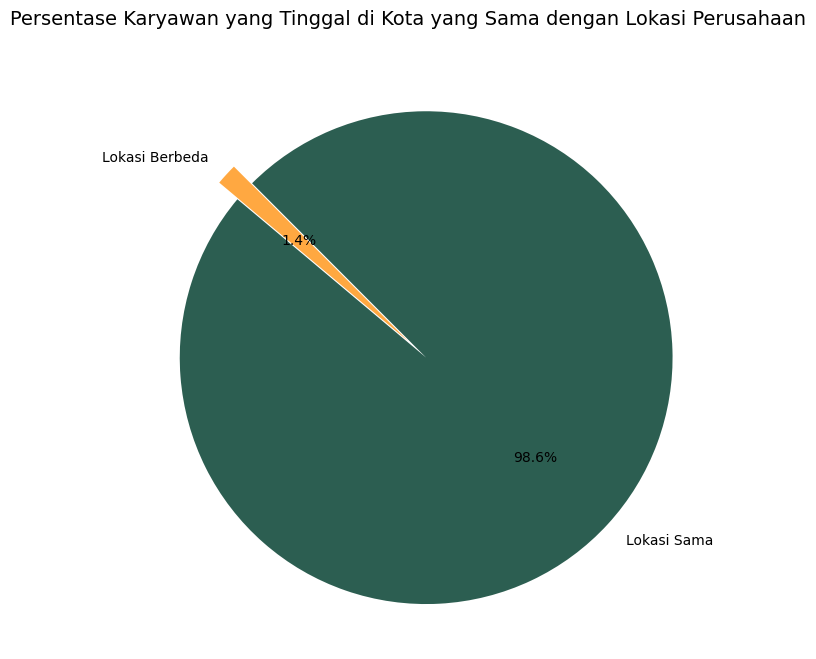

In [75]:
#Pertanyaan No 4
# Data untuk pie chart
labels = ['Lokasi Sama', 'Lokasi Berbeda']
sizes = same_location_count.values
colors = ['#2c5e51', '#ffa841']
explode = (0.1, 0)

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode
)
plt.title('Persentase Karyawan yang Tinggal di Kota yang Sama dengan Lokasi Perusahaan', fontsize=14)
plt.show()


**Insight:** Berapa persentase karyawan yang tempat(employee residence) tinggalnya berada di kota yang sama dengan lokasi perusahaan(company location) tempat mereka bekerja?


Berdasarkan hasil analisis, persentase karyawan yang tinggal di kota yang sama dengan lokasi perusahaan tempat mereka bekerja sangat tinggi, yaitu mencapai 98,6%. Sementara itu, hanya 1,4% karyawan yang tinggal di kota berbeda dengan lokasi perusahaan mereka. Hal ini menunjukkan bahwa mayoritas pekerja cenderung bekerja di lokasi yang sama dengan tempat tinggal mereka, yang mungkin dipengaruhi oleh faktor-faktor salah satunya yaitu kemudahan akses.

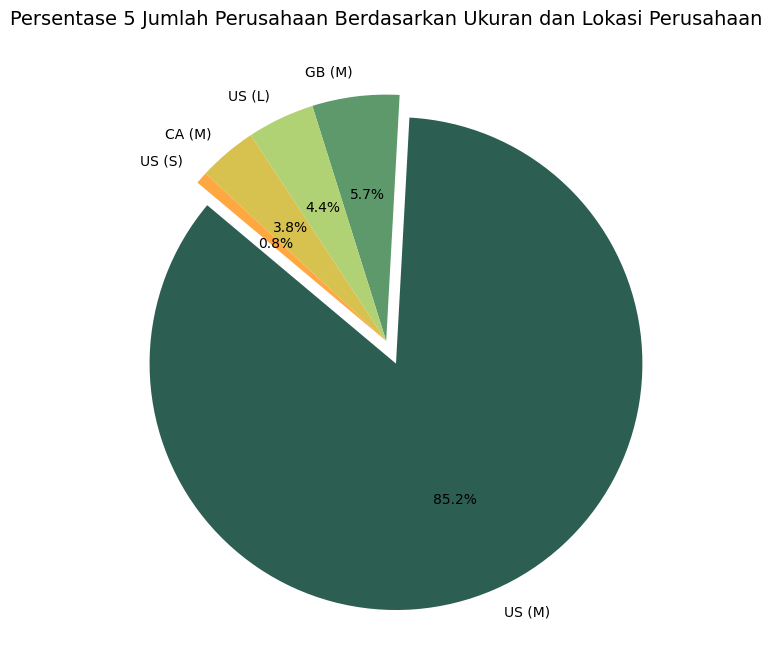

In [76]:
#Pertanyaan No 5
# Data untuk visualisasi
locations = top_company_size_location['company_location'] + " (" + top_company_size_location['company_size'] + ")"
counts = top_company_size_location['count']

# Data untuk visualisasi
labels = locations
sizes = counts
explode = (0.1, 0,0,0,0)

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#2c5e51' ,'#5d996a', '#b1d274' ,'#d7c14f' ,'#ffa841'],
        explode=explode)
plt.title('Persentase 5 Jumlah Perusahaan Berdasarkan Ukuran dan Lokasi Perusahaan', fontsize=14)
plt.show()


**Insight:** Bagaimana persentase antara ukuran perusahaan(company size) dan lokasi perusahaan(company location) dengan jumlah karyawan terbanyak?

Berdasarkan hasil analisis, lokasi perusahaan dengan jumlah karyawan terbanyak terdapat di US, diikuti oleh CA dan GB. Selain itu, ukuran perusahaan yang memiliki jumlah karyawan terbanyak di US adalah perusahaan dengan ukuran menengah (M).

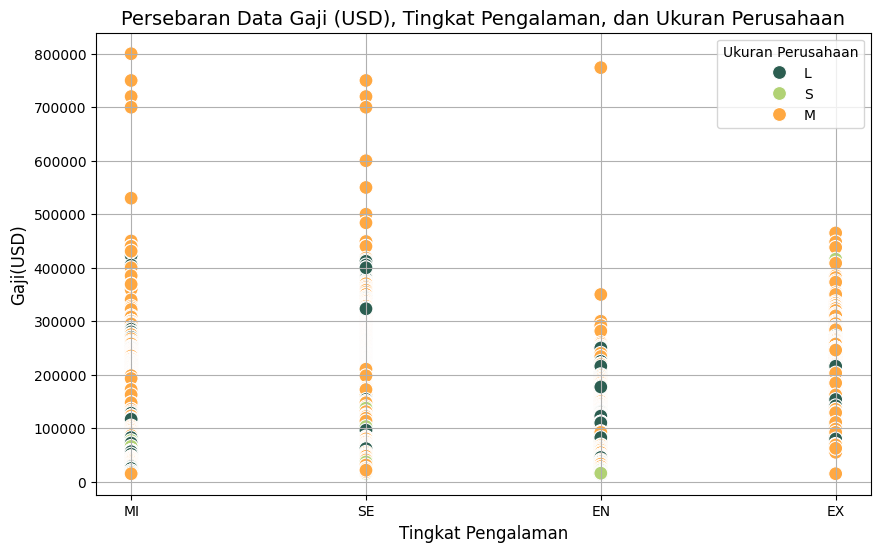

In [77]:
#Pertanyaan No 6
# Contoh data sederhana
df = salaries_dataset_df

# Scatter plot dengan warna kategori
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='experience_level',
    y='salary_in_usd',
    hue='company_size',
    palette=['#2c5e51' ,'#b1d274', '#ffa841'],
    s=100
)

# Menambahkan label dan judul
plt.title('Persebaran Data Gaji (USD), Tingkat Pengalaman, dan Ukuran Perusahaan', fontsize=14)
plt.xlabel('Tingkat Pengalaman', fontsize=12)
plt.ylabel('Gaji(USD)', fontsize=12)
plt.legend(title='Ukuran Perusahaan')
plt.grid(True)
plt.show()


**Insight:** Bagaimana persebaran data antara gaji(salary in usd), tingkat pengalaman(experience level), dan ukuran perusahaan(company size)?

Berdasarkan analisis, dapat dilihat bahwa persebaran data gaji (salary in USD) untuk perusahaan dengan ukuran menengah (M) tersebar merata di keempat tingkat pengalaman. Hal ini kemungkinan terjadi karena jumlah perusahaan dengan ukuran menengah (M) lebih banyak dibandingkan dengan perusahaan besar (L) atau kecil (S), sehingga persebaran data gaji pada perusahaan ukuran M lebih luas.

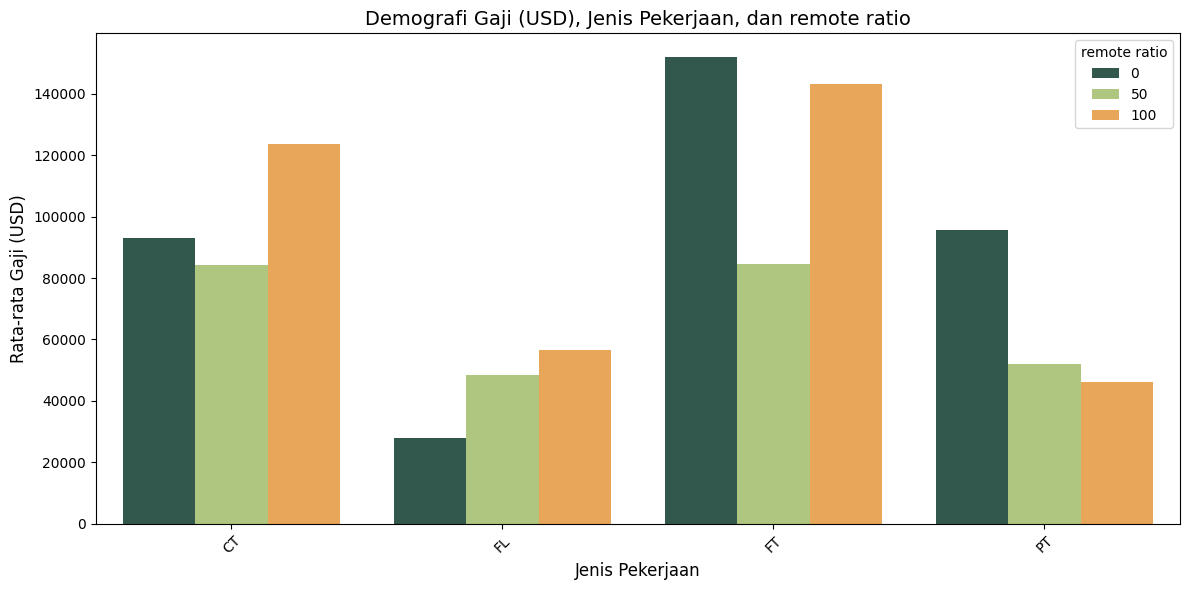

In [78]:
#Pertanyaan No 7
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(
    data=aggregated_data,
    x='employment_type',
    y='salary_in_usd',
    hue='remote_ratio',
    palette=['#2c5e51' ,'#b1d274', '#ffa841']
)

# Tambahkan detail visualisasi
plt.title('Demografi Gaji (USD), Jenis Pekerjaan, dan remote ratio', fontsize=14)
plt.xlabel('Jenis Pekerjaan', fontsize=12)
plt.ylabel('Rata-rata Gaji (USD)', fontsize=12)
plt.legend(title='remote ratio', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight:** Bagaimana demografi antara gaji(salary in usd), jenis pekerjaan(employment type), dan rasio pekerjaan jarak jauh(remote ratio)?

Berdasarkan analisis, dapat dilihat bahwa jenis pekerjaan full time memiliki rasio pekerjaan remote ratio yang bervariasi. Hal ini dilihat dari persentase karyawan yang tinggal di kota yang sama dengan lokasi perusahaan. Faktor ini berkontribusi pada tingginya persentase jenis pekerjaan full time, yang cenderung memiliki opsi pekerjaan remote ratio yang lebih fleksibel. Keberagaman rasio pekerjaan remote ratio pada jenis pekerjaan full time dapat dijelaskan dengan banyaknya karyawan yang berada di lokasi yang sama, memudahkan perusahaan untuk menawarkan berbagai model pekerjaan, baik yang jarak dekat maupun yang bekerja dari remote ratio.

In [79]:
all_df.to_csv("all_data.csv", index=False)